# Machine Learning with Scikit-learn

Scikit-learn is the most popular machine learning library in Python, providing efficient implementations of a wide range of algorithms for classification, regression, clustering, and more.

## Setup and Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Scikit-learn version:", __import__('sklearn').__version__)

Scikit-learn version: 1.7.0


## Data Loading and Preprocessing

In [2]:
# Load sample datasets
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Create synthetic datasets
X_class, y_class = make_classification(n_samples=1000, n_features=20, n_informative=10,
                                     n_redundant=10, n_classes=2, random_state=42)

X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

print("Datasets loaded:")
print(f"Iris: {X_iris.shape} features, {len(np.unique(y_iris))} classes")
print(f"Synthetic Classification: {X_class.shape} features, {len(np.unique(y_class))} classes")
print(f"Synthetic Regression: {X_reg.shape} features, continuous target")

# Split data into train/test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

print("\nTrain/test splits:")
print(f"Iris: {X_train_iris.shape[0]} train, {X_test_iris.shape[0]} test samples")
print(f"Classification: {X_train_class.shape[0]} train, {X_test_class.shape[0]} test samples")
print(f"Regression: {X_train_reg.shape[0]} train, {X_test_reg.shape[0]} test samples")

Datasets loaded:
Iris: (150, 4) features, 3 classes
Synthetic Classification: (1000, 20) features, 2 classes
Synthetic Regression: (1000, 10) features, continuous target

Train/test splits:
Iris: 105 train, 45 test samples
Classification: 700 train, 300 test samples
Regression: 700 train, 300 test samples


## Classification Algorithms

Logistic Regression:
.3f
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

--------------------------------------------------
Decision Tree:
.3f
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

--------------------------------------------------
Random Forest:
.3f
Classification Report:
    

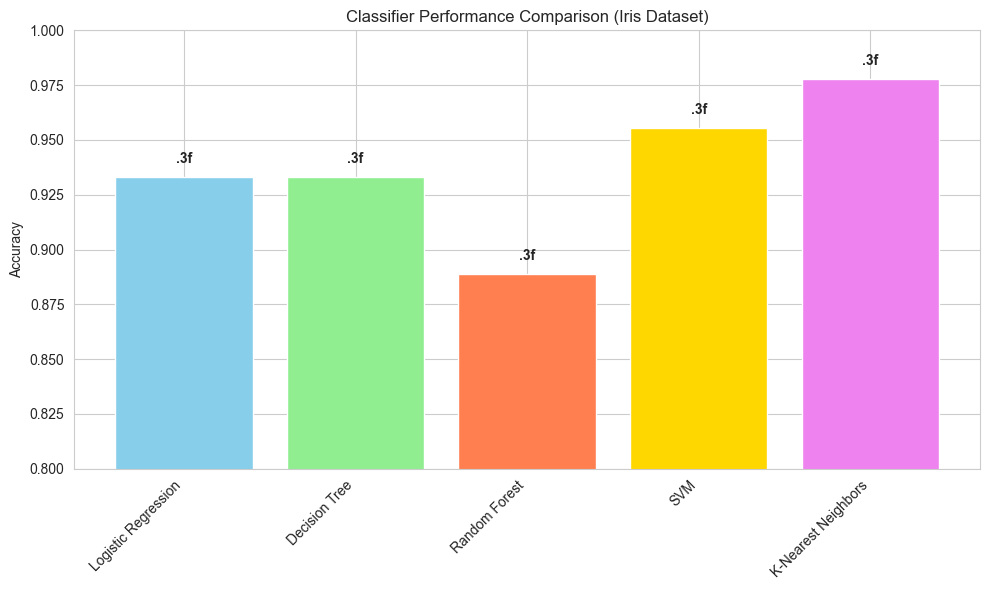

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate classifiers on Iris dataset
results = {}
for name, clf in classifiers.items():
    # Train
    clf.fit(X_train_iris, y_train_iris)

    # Predict
    y_pred = clf.predict(X_test_iris)

    # Evaluate
    accuracy = accuracy_score(y_test_iris, y_pred)
    results[name] = accuracy

    print(f"{name}:")
    print(".3f")
    print("Classification Report:")
    print(classification_report(y_test_iris, y_pred, target_names=iris.target_names))
    print("-" * 50)

# Plot results
plt.figure(figsize=(10, 6))
names = list(results.keys())
accuracies = list(results.values())
bars = plt.bar(names, accuracies, color=['skyblue', 'lightgreen', 'coral', 'gold', 'violet'])
plt.title('Classifier Performance Comparison (Iris Dataset)')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             '.3f', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Regression Algorithms

Linear Regression:
.4f
.4f
------------------------------
Decision Tree:
.4f
.4f
------------------------------
Random Forest:
.4f
.4f
------------------------------
Support Vector Regression:
.4f
.4f
------------------------------


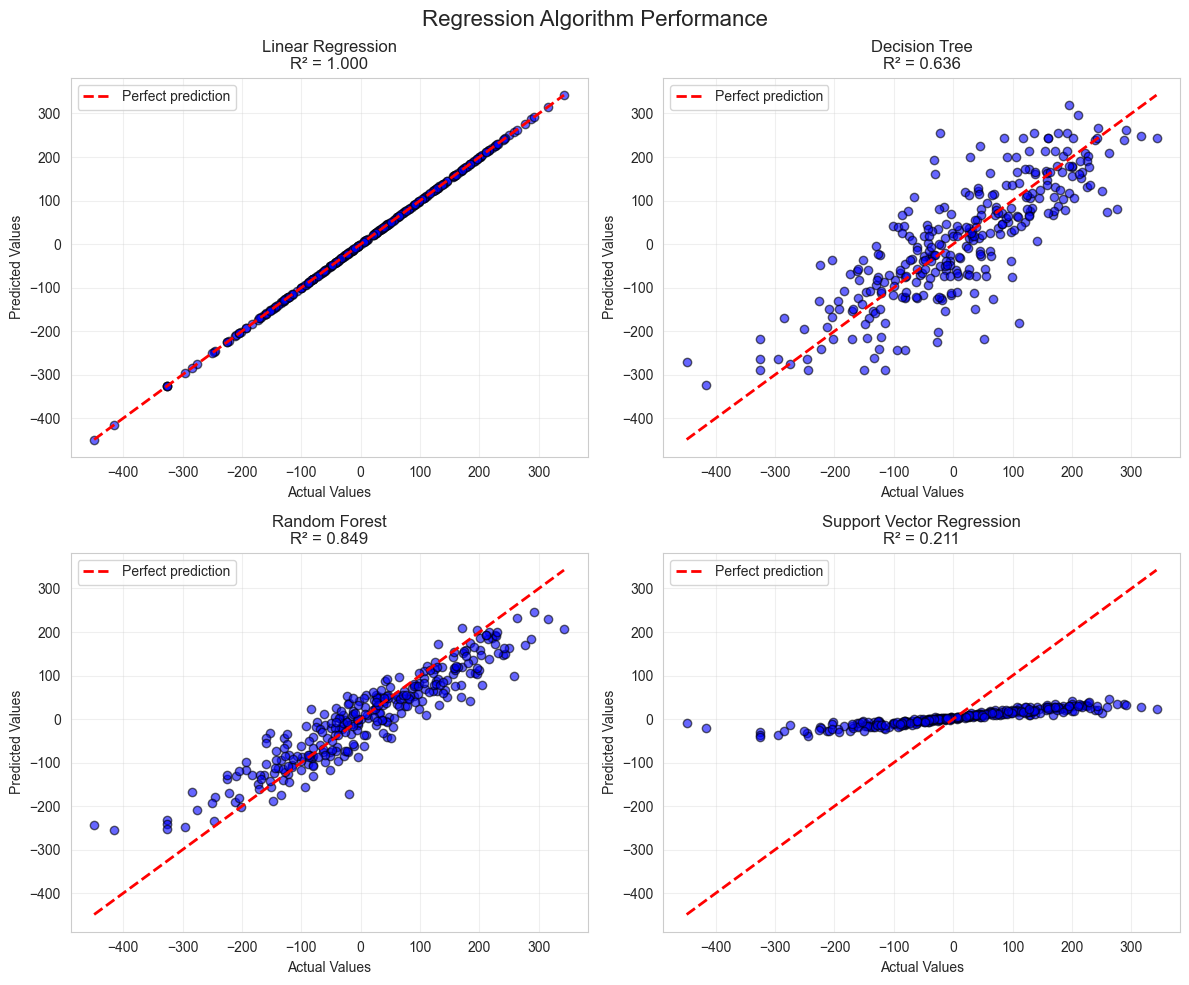

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Train and evaluate regressors
reg_results = {}
for name, reg in regressors.items():
    # Train
    reg.fit(X_train_reg, y_train_reg)

    # Predict
    y_pred_reg = reg.predict(X_test_reg)

    # Evaluate
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    reg_results[name] = {'MSE': mse, 'R²': r2}

    print(f"{name}:")
    print(".4f")
    print(".4f")
    print("-" * 30)

# Plot regression results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Regression Algorithm Performance', fontsize=16)

for i, (name, reg) in enumerate(regressors.items()):
    ax = axes[i//2, i%2]

    # Get predictions
    reg.fit(X_train_reg, y_train_reg)
    y_pred = reg.predict(X_test_reg)

    # Scatter plot of actual vs predicted
    ax.scatter(y_test_reg, y_pred, alpha=0.6, color='blue', edgecolors='k')
    ax.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()],
            'r--', lw=2, label='Perfect prediction')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name}\nR² = {reg_results[name]["R²"]:.3f}')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

## Model Evaluation and Validation

Cross-Validation Results (Random Forest on Iris):
CV Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.967
Std Accuracy: 0.021

Grid Search Results:
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.952
Best Estimator: RandomForestClassifier(n_estimators=50, random_state=42)


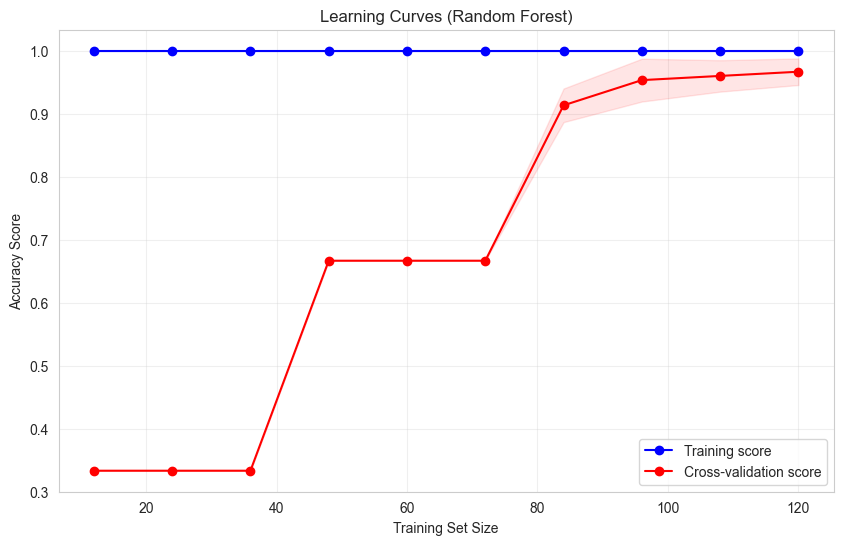

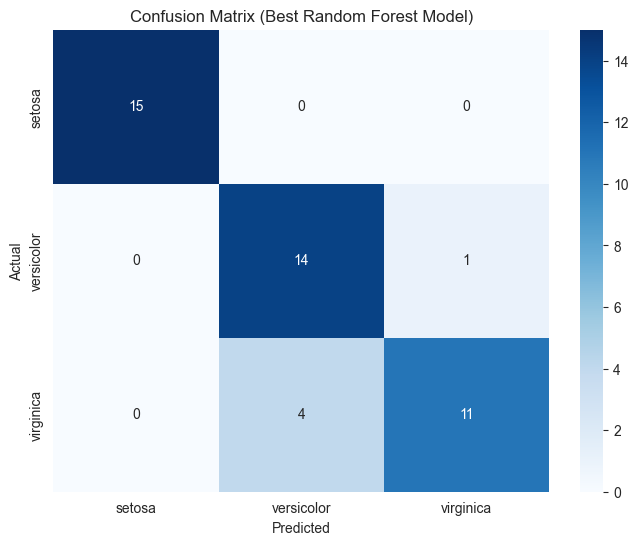

In [ ]:
# Cross-validation and hyperparameter tuning
from sklearn.model_selection import learning_curve, validation_curve

# Example: Cross-validation with Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(rf_clf, X_iris, y_iris, cv=5, scoring='accuracy')

print("Cross-Validation Results (Random Forest on Iris):")
print(f"CV Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.3f}")
print(f"Std Accuracy: {cv_scores.std():.3f}")

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_iris, y_train_iris)

print("Grid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.3f}")
print(f"Best Estimator: {grid_search.best_estimator_}")

# Learning curves
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42, **grid_search.best_params_),
    X_iris, y_iris, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Confusion Matrix
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_iris)

cm = confusion_matrix(y_test_iris, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix (Best Random Forest Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Scikit-learn Summary

**Key Features:**
- Comprehensive machine learning library with algorithms for classification, regression, clustering, and dimensionality reduction
- Consistent API across all algorithms (fit/predict pattern)
- Built-in datasets, model selection tools, and evaluation metrics
- Integration with NumPy and pandas
- Excellent documentation and community support

**Main Algorithm Categories:**
- **Classification**: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, KNeighborsClassifier
- **Regression**: LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR
- **Clustering**: KMeans, DBSCAN, AgglomerativeClustering
- **Dimensionality Reduction**: PCA, t-SNE, LDA
- **Preprocessing**: StandardScaler, MinMaxScaler, LabelEncoder

**Model Selection Tools:**
- `train_test_split()`: Split data into training and testing sets
- `cross_val_score()`: Evaluate model using cross-validation
- `GridSearchCV()`: Hyperparameter tuning with grid search
- `learning_curve()`: Plot learning curves to diagnose bias/variance

**Evaluation Metrics:**
- **Classification**: accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
- **Regression**: mean_squared_error, r2_score
- **General**: classification_report

**Best Practices:**
- Always split data into train/test sets before training
- Use cross-validation for robust performance estimation
- Scale features when using distance-based algorithms (SVM, KNN)
- Perform hyperparameter tuning to optimize model performance
- Use appropriate evaluation metrics for your problem type
- Consider ensemble methods for improved performance

Next: Plotly for Interactive Visualization